<a href="https://colab.research.google.com/github/Dethkalleon/MLKublik/blob/main/%D0%9A%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%95%D0%98_%D0%9C%D0%9B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР 4.1 - Метрики эффективности моделей машинного обучения

### Цель работы
Научиться измерять эффективность моделей машинного обучения с помощью метрик, вибирать метрики исходя из задачи, разбивать датасет на обучающую и тестовую подвыборки.

### Содержание работы
1. Загрузите данные о вероятности развития сердечного приступа, прилагающийся к этой работе (heart.csv).
2. Обучите на этих данных простую модель логистической регрессии и выведите метрику точности (accuracy).
3. Разделите датасет на две части - первую половину используйте для обучения, а вторую - для оценки точности. Сравните значения метрик.
4. Разделите датасет на две части случайным образом. Повторите анализ.
5. Разделите датасет с помощью библиотечной функции. Повторите анализ несколько раз.
6. Постройте матрицу классификации и отчет о классификации для обученной модели для обучающей и тестовой выборок. Проинтерпретируйте полученные значения.
7. Подсчитайте для построенной модели значение всех метрик эффективности классификации на тестовой и обучающей выборках. Нужно использовать следующие метрики: accuracy, precision, recall, f1.

### Выполнение

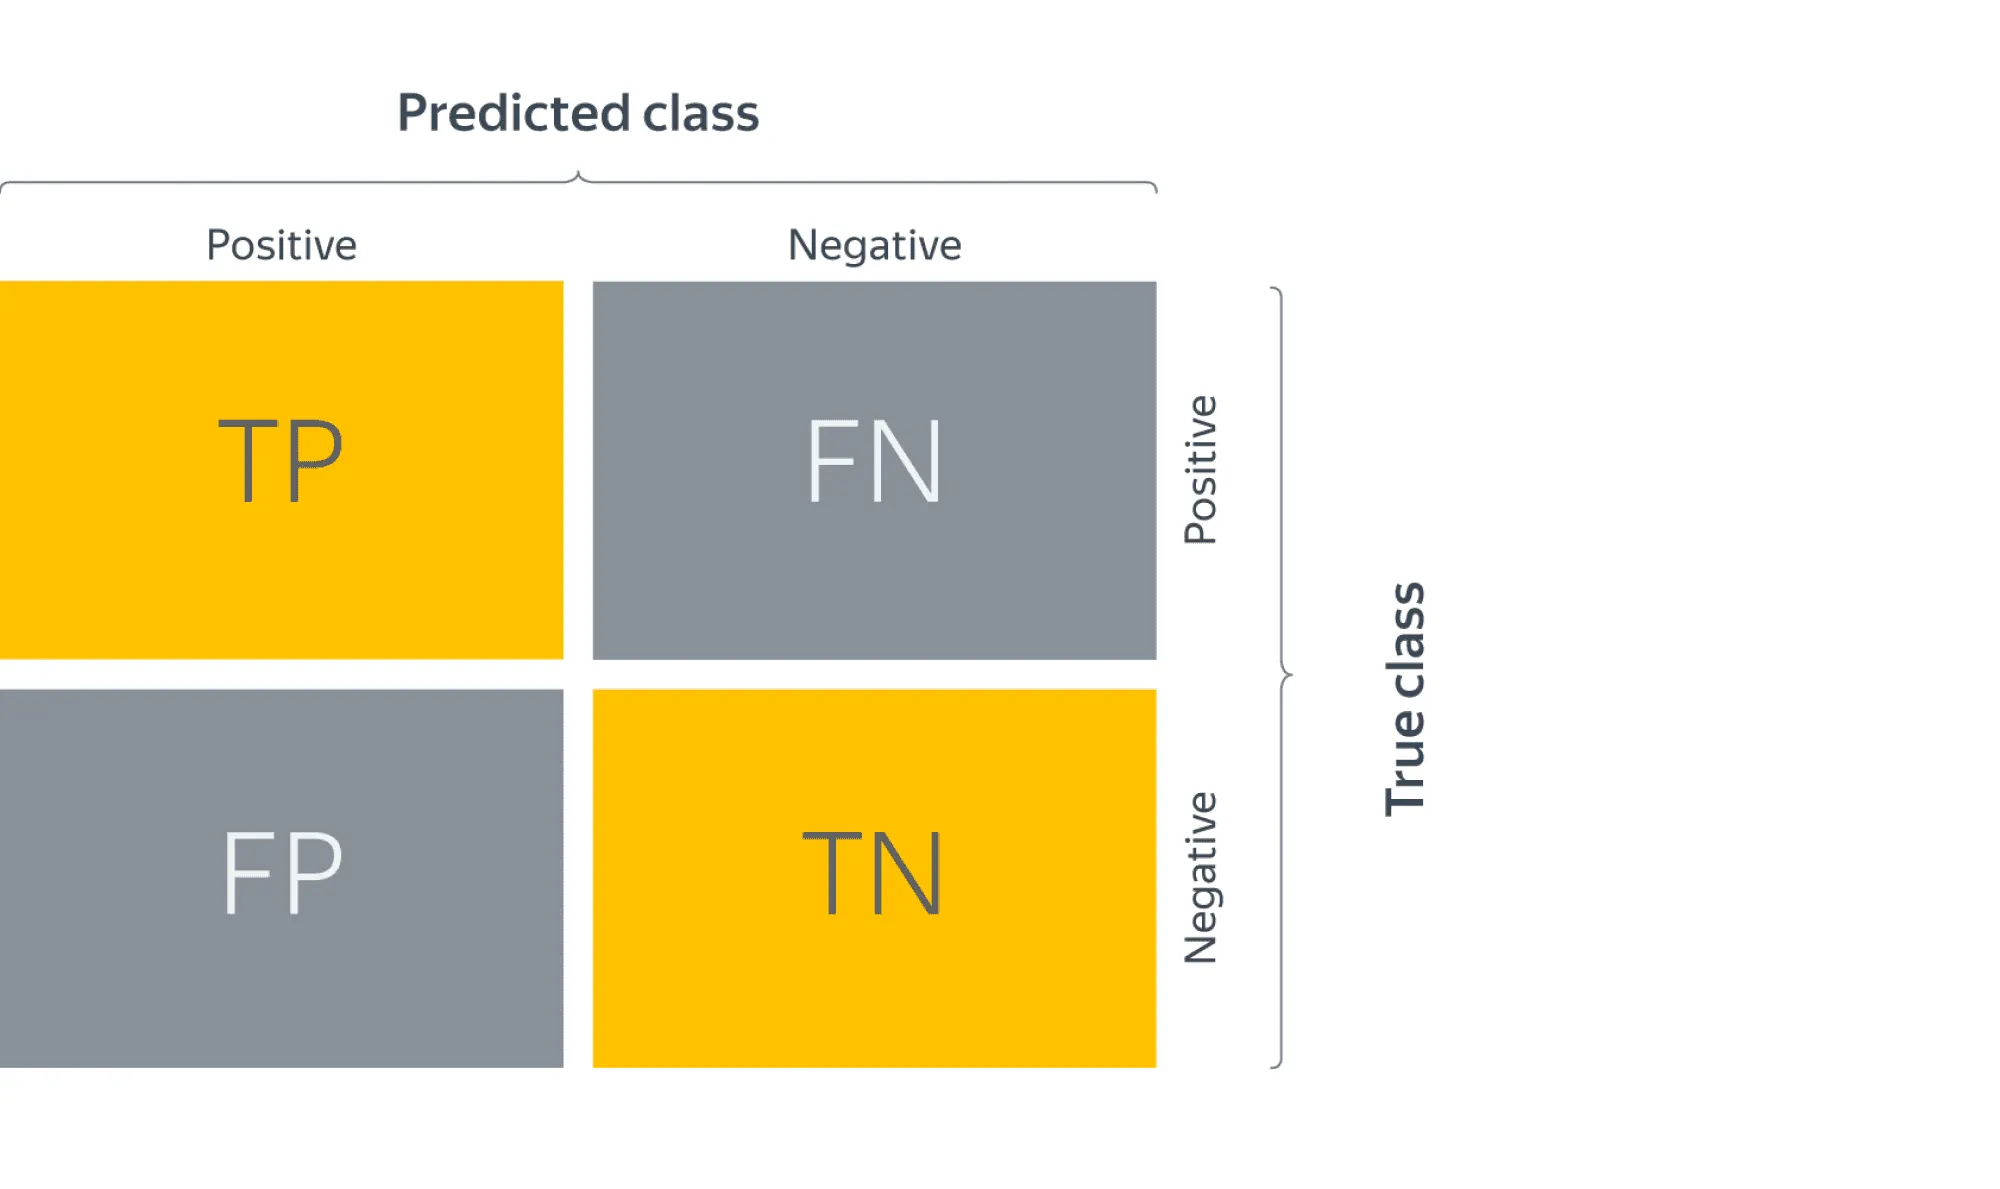

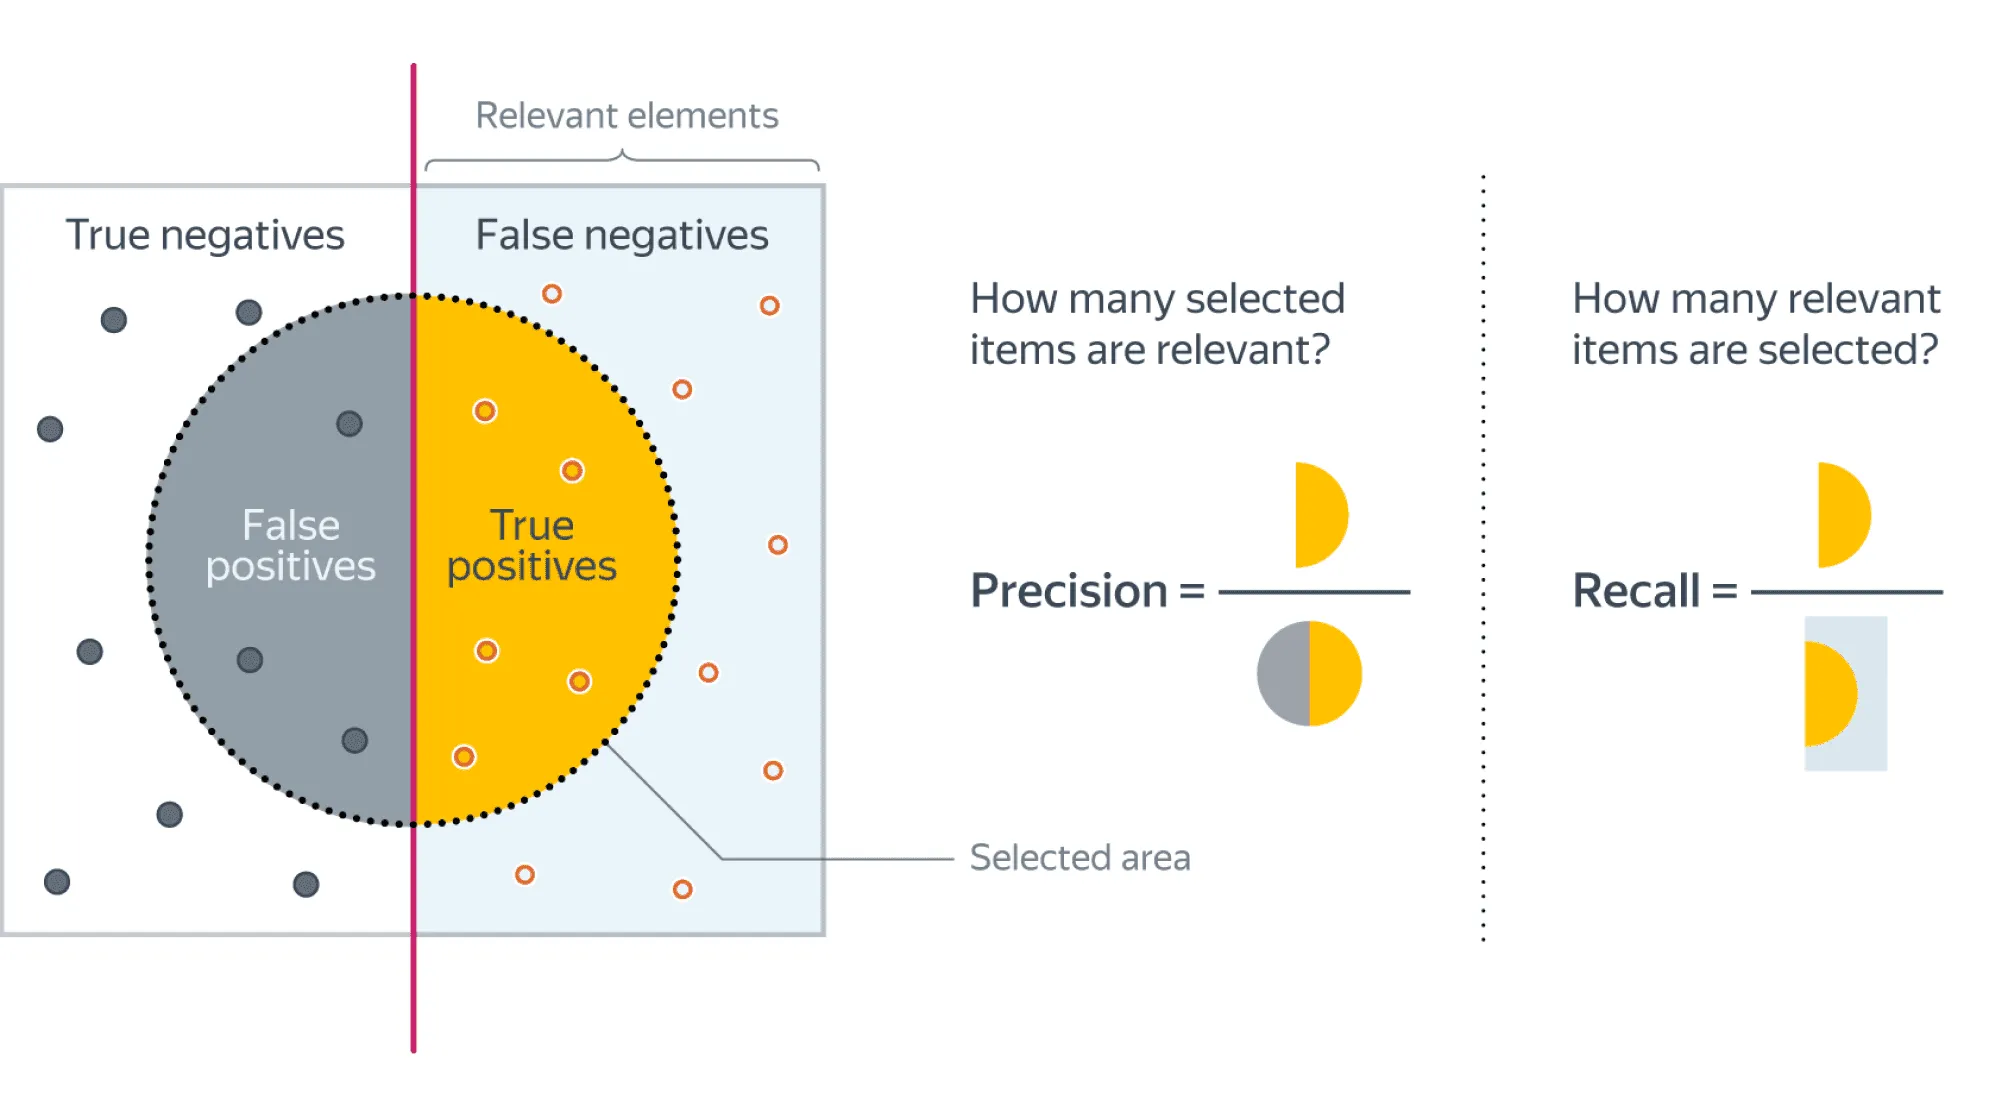

Precision - доля правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом. Сколько предсказанных положительных значений верно?

> Precision = TP/(TP+FP)


Recall - доля правильно найденных положительных объектов среди всех объектов положительного класса. Сколько положительных значений предсказаны верно?
> Recall = TP/(TP+FN)


Модели очень удобно сравнивать, когда их качество выражено одним числом. В случае пары Precision-Recall существует популярный способ скомпоновать их в одну метрику - взять их среднее гармоническое: F1-score.

> Fb = (b\*\*2 + 1) (Recall \* Precision)/(Recall + (b\*\*2) \* Precision)

b - коэффицент важности, обычно его принимают за 1, если нам одинаково важны и Recall, и Precision:

> F1 = 2 \* (Recall \* Precision)/(Recall + Precision)


Для многоклассовой классификации F1-score можно рассчитывать тремя основными способами:


1.   Микроусреднение - усредняем элементы матрицы ошибок (TP, FP, TN, FN), затем по одной усреднённой матрице ошибок считаем F-меру (так же можно найти и Recall, и Precision).
2.   Макроусреднение - считаем Precision, Recall для каждого классификатора отдельно, а потом усредняем.
3.   Взвешенноее усреднение (Weighted-averaging) - похож на макроусреднение, но учитывает размер каждого класса. Чем больше данных в классе, тем больший вклад он вносит в итоговый F1-score.

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y = data["output"]
x = data.drop("output", axis=1)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548

In [ ]:
x_train, y_train = x[:200], y[:200]

x_train.shape, y_train.shape

((200, 13), (200,))

In [ ]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.5339805825242718)

На обучающей выборки точность модели даже немного повысилась, до 90%. Это произошло за счет того, что в обучающей выборке меньше данных, чем в целом датасете. А чем меньше точек, тем проще модели под них подстроиться. А вот эффективность модели на тестовых данных стала сильно ниже - всего 54%. Это значит, что наша модель чуть лучше, чем простое угадывание. Хотя, как увидим дальше, на самом деле не все так плохо.

Вместо того, чтобы вручную задавать количество объектов, которые отводятся на обучающую выборку, можно выразить это количество через процент от всего объема датасета. Это даст нам универсальность:



In [ ]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8884297520661157, 0.6229508196721312)

In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Датасет отсортирован по значению целевой переменной.

Заведем список булевых значений, в которых количество истинных значений будет соответствовать желаемому объему обучающей выборки, а ложных - объему тестовой:



In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))
mask.shape

(303,)

Перемешаем

In [ ]:
shuffle(mask)
mask

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [ ]:
x_train = x[mask]
x_train.shape

(242, 13)

Смысл этого приема в том, что мы можем применить одну и ту же маску к обоим частям массива. А если инвертировать эту маску, то выберем оставшиеся значения:



In [ ]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8677685950413223, 0.7704918032786885)

Библиотечный вариант

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Построение метрик качества классификации

In [ ]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)
confusion_matrix(y_train, y_train_pred)

array([[ 87,  28],
       [ 11, 116]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[18,  5],
       [ 2, 36]])

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.88      0.95      0.91        38

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
precision_score(y_test, y_test_pred)

0.8780487804878049

In [ ]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.838843,0.885246
Precision,0.805556,0.878049
Recall,0.913386,0.947368
F1,0.856089,0.911392


### Задания для самостоятельного выполнения

#### Задание 1
Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

Нормализация важна для перцептрона, опорных векторов и k ближайших соседей

In [ ]:
models = [
    Perceptron(max_iter=1000, tol=1e-3, random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='linear', random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

for model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"Model: {model}")
    print(classification_report(y_test, y_pred))

Model: Perceptron(random_state=42)
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        24
           1       0.81      0.68      0.74        37

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.73      0.70      0.71        61

Model: DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.81      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61

Model: SVC(kernel='linear', random_state=42)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

    accuracy                           0.82        61
 

#### Задание 2
Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    Perceptron(max_iter=1000, tol=1e-3, random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='linear', random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

for model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"Model: {model}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Perceptron(random_state=42)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

--------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Model: SVC(kernel='linear', random_state=42)
         

#### Задание 3
Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

In [ ]:
california = fetch_california_housing()
X, y = california.data, california.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='rbf'),
    KNeighborsRegressor(n_neighbors=5),
    MLPRegressor(random_state=42, max_iter=500)
]

for model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)

    print(f"Модель: {model}")
    print(f"R^2: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MedAE: {medae:.4f}")
    print("-"*50)

Модель: LinearRegression()
R^2: 0.5758
MAE: 0.5332
MSE: 0.5559
RMSE: 0.7456
MedAE: 0.4102
--------------------------------------------------
Модель: DecisionTreeRegressor(random_state=42)
R^2: 0.6230
MAE: 0.4539
MSE: 0.4940
RMSE: 0.7028
MedAE: 0.2635
--------------------------------------------------
Модель: RandomForestRegressor(random_state=42)
R^2: 0.8053
MAE: 0.3274
MSE: 0.2552
RMSE: 0.5051
MedAE: 0.2011
--------------------------------------------------
Модель: SVR()
R^2: 0.7276
MAE: 0.3986
MSE: 0.3570
RMSE: 0.5975
MedAE: 0.2588
--------------------------------------------------
Модель: KNeighborsRegressor()
R^2: 0.6700
MAE: 0.4462
MSE: 0.4324
RMSE: 0.6576
MedAE: 0.2910
--------------------------------------------------
Модель: MLPRegressor(max_iter=500, random_state=42)
R^2: 0.7769
MAE: 0.3688
MSE: 0.2924
RMSE: 0.5407
MedAE: 0.2541
--------------------------------------------------


# ЛР 4.2 - Площадь под графиком и управление порогом

### Цель работы

Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации


### Содержание работы

1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

### Выполнение

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression().fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

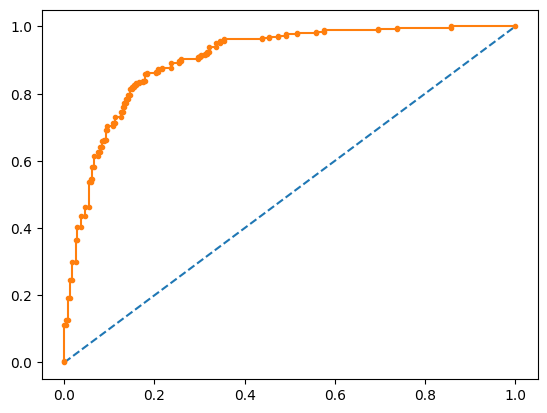

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.9027724358974359)

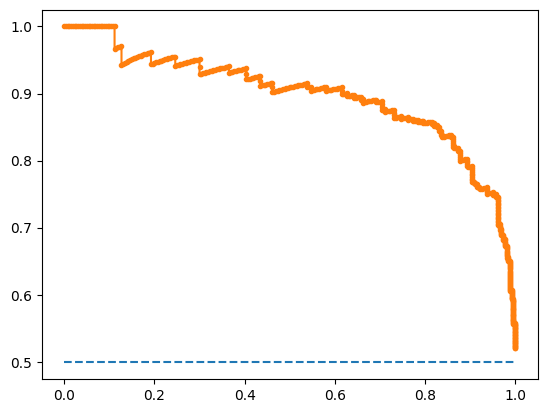

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

np.float64(0.897662372903334)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



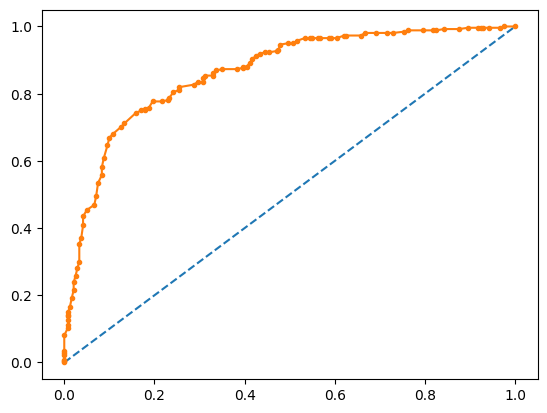

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

Наиболее явно различия между этими двумя классификационными кривыми - ROC и PR - демонстрирует пример с большим дизбалансом классов. Давайте сгенерируем датасет, в котором объектов разных классов не примерно равное количество, как в предыдущем примере, а объектов отрицательного класса, скажем, 99%. Для этого очень удобно воспользоваться атрибутом weights функции make_classification:



In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


Видно, что в одной половине выборки положительных объектов в два раза больше, чем в другой. Прислучайном разделении, если есть сильно миноритарные классы, может случиться и не такое. Например, мы можем случайно получить выборку, в которой какие-то классы не представлены вообще. Для предотвращения таких случаев нужно воспользоваться стратификацией:



Это агрумент следит за тем, чтобы в обоих частях выборки распределение переданного атрибута было примерно такое же, как и целом датасете. Вот какая картина получается сейчас:



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



Здесь мы видим классическую картину обучения на неравномерной выборке. Мажоритарный класс (в данном случае - отрицательный, он у нас в большинстве) распознается очень хорошо, а миноритарный - очень плохо. В нашем случае, вообще по положительному классу все метрики нулевые. Но обратите внимание, что общая точность (accuracy) модели весьма приемлема - 98%. Дизбаланс классов "скрывает" в точности недостатки работы модели.



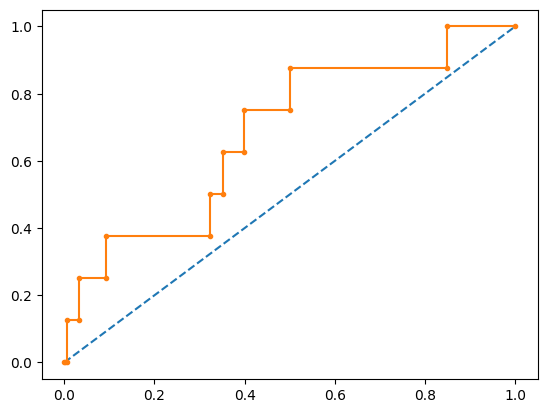

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

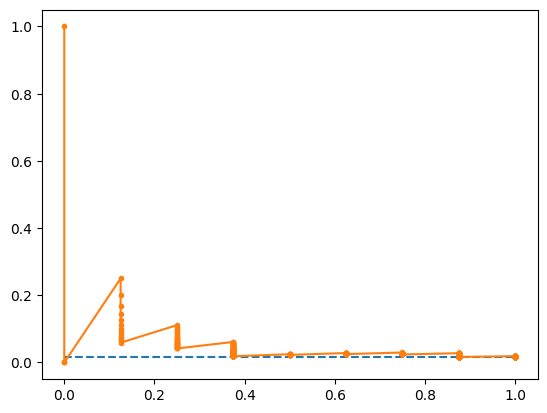

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

И вот на этом графике уже открывается истинное поведение модели: она не очень-то отличается от тривиальной, просто чаще предсказывает самый распространенный класс. Так как метрики Precision и Recall специально были созданы для случая несбалансированных классов, именно PR-кривая дает более реалистические оценки эффективности работы моделей классификации на таких данных, где наблюдается большой дисбаланс классов.

Кривые классификации, несомненно, удобный и визуальный способ представления эффективности работы моделей машинного обучения. Но главная их ценность состоит в том, что данные, которые необходимы для их построения могут использоваться для оптимизации порога классификации. Мы уже поняли, что разные значения порога могут приводить к разному поведению моделей и, как следствие, к имзенению метрик. Значит, можно выбрать такой порог, который дает более точную классификацию?

Да, но для этого нам понадобится некоторый критерий - численное значение, которые мы хотим оптимизировать. В лекции мы уже говорили, что простые метрики - precision, recall, accuracy - не очень подходят на роль критерия оптимизации. Но мы можем использовать, например, метрику F1 (и любые метрики из F-семейства). Для этого еще раз сгенерируем датасет, сделаем чуть больше объем данных:



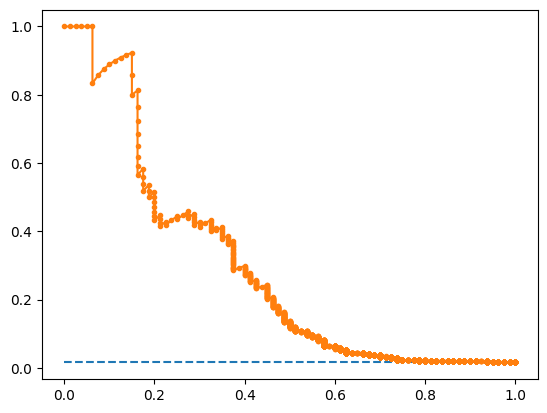

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
from numpy import argmax

Вычислим вектор метрик F1 при всех использованных значениях порога и найдем самое большое значение среди них (вернее, его индекс):

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.13222184977648932)

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.132222, F-Score=0.378


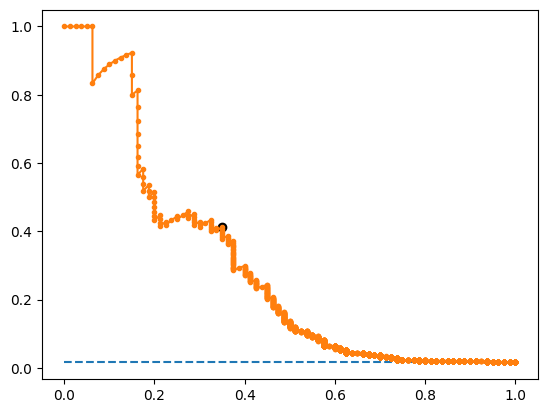

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.40      0.34      0.37        80

    accuracy                           0.98      5000
   macro avg       0.70      0.66      0.68      5000
weighted avg       0.98      0.98      0.98      5000



А вот порого по умолчанию

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.90      0.11      0.20        80

    accuracy                           0.99      5000
   macro avg       0.94      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



### Задания для самостоятельного выполнения

Поведение кривой в зависимости от распределения классов
https://yastatic.net/s3/academy/ml/roc_auc/roc.html

#### Задание 1
Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.



In [ ]:
import seaborn as sns

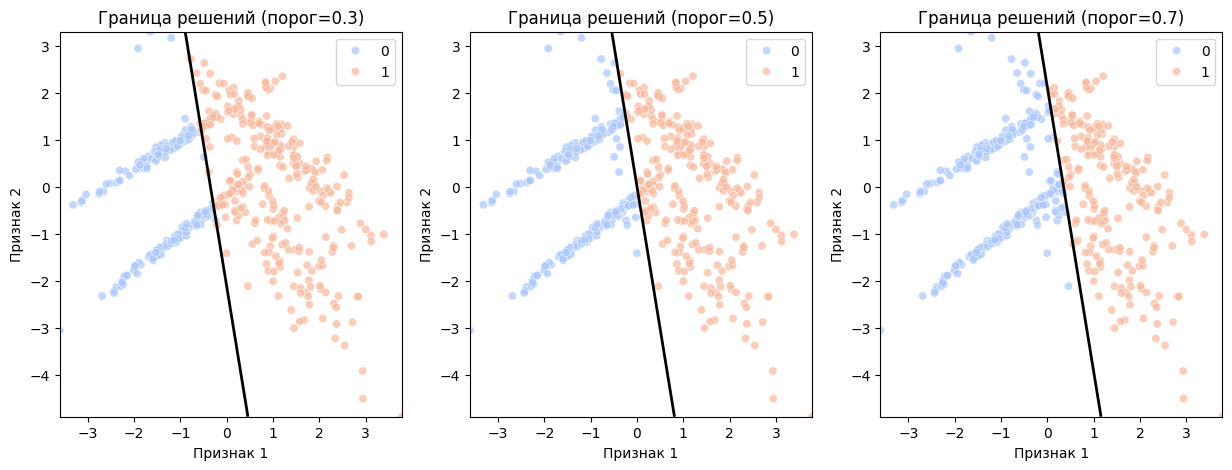

In [ ]:
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

thresholds=[0.3, 0.5, 0.7]

plt.figure(figsize=(15, 5))


for i, threshold in enumerate(thresholds, 1):
    plt.subplot(1, len(thresholds), i)

    # Получаю вероятности и применяем порог
    probs = model.predict_proba(X)[:, 1]
    preds = (probs >= threshold).astype(int)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=preds, palette="coolwarm", alpha=0.7)

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                          np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[threshold], colors='black', linewidths=2)

    plt.title(f"Граница решений (порог={threshold})")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")

plt.show()

#### Задание 2
Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.


In [ ]:
from sklearn.datasets import fetch_openml

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

--------------------------------------------------


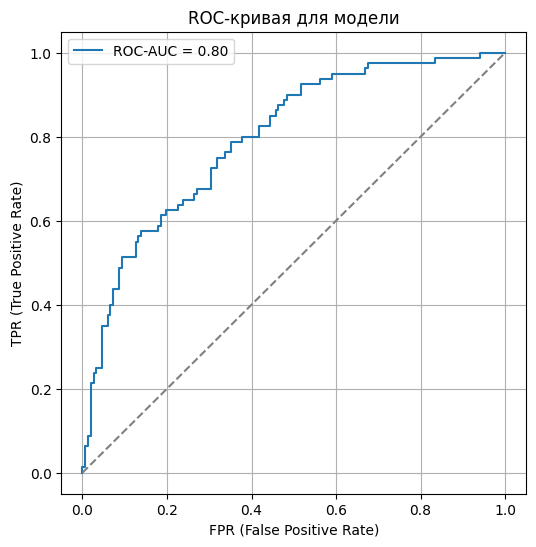

In [ ]:
diabetes = fetch_openml(name="diabetes", version=1, as_frame=True)

X = diabetes.data.select_dtypes(include=np.number)
y = (diabetes.target == "tested_positive").astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("-"*50)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("ROC-кривая для модели")
plt.legend()
plt.grid()
plt.show()


#### Задание 3
В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

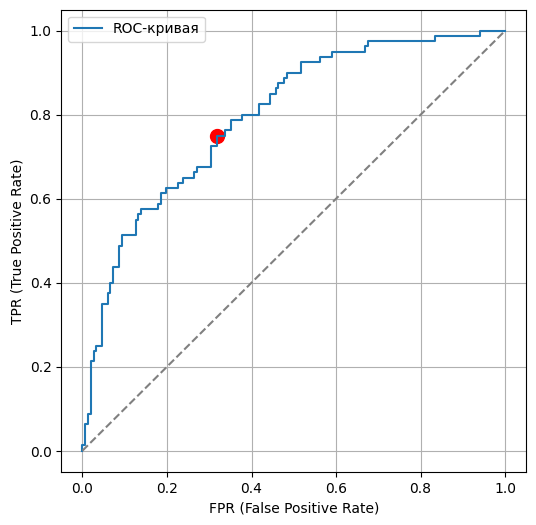

Оптимальный порог: 0.31


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# среднее геометрическое tpr и fpr для каждого порога
gmeans = np.sqrt(tpr * (1 - fpr))

best_idx = np.argmax(gmeans)
best_threshold = thresholds[best_idx]

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="ROC-кривая")
plt.scatter(fpr[best_idx], tpr[best_idx], color="red", s=100)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend()
plt.grid()
plt.show()

print(f"Оптимальный порог: {best_threshold:.2f}")


#### Задание 4
При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.


Выше - справка по f1

<ipython-input-25-c2629b6311a1>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


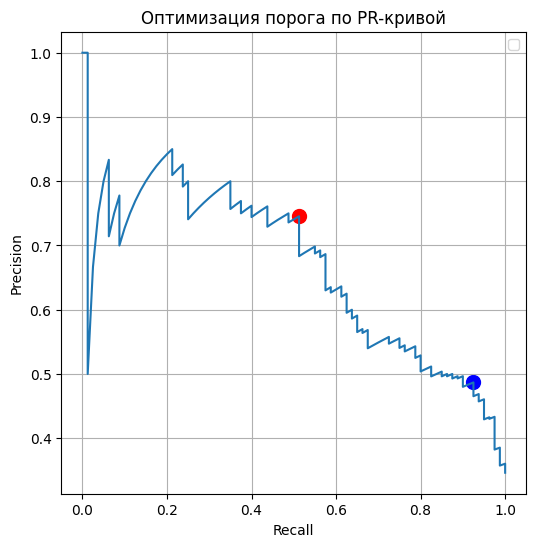

Оптимальный порог для Precision (0.5): 0.65
Оптимальный порог для Recall (2): 0.16


In [ ]:
def f_beta(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

f_beta_precision = f_beta(precision[:-1], recall[:-1], 0.5) # Precision важнее
f_beta_recall = f_beta(precision[:-1], recall[:-1], 2) # Recall важнее

best_idx_precision = np.argmax(f_beta_precision)
best_idx_recall = np.argmax(f_beta_recall)

best_threshold_precision = thresholds[best_idx_precision]
best_threshold_recall = thresholds[best_idx_recall]

plt.figure(figsize=(6, 6))
plt.plot(recall, precision)
plt.scatter(recall[best_idx_precision], precision[best_idx_precision], color="red", s=100)
plt.scatter(recall[best_idx_recall], precision[best_idx_recall], color="blue", s=100)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Оптимизация порога по PR-кривой")
plt.legend()
plt.grid()
plt.show()

print(f"Оптимальный порог для Precision ({0.5}): {best_threshold_precision:.2f}")
print(f"Оптимальный порог для Recall ({2}): {best_threshold_recall:.2f}")


#### Задание 5
Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


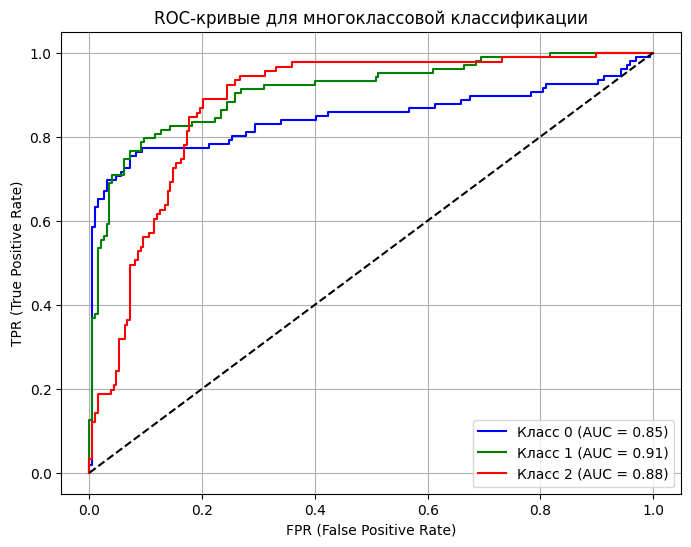

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=4, n_features=6,
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class="ovr", max_iter=500)
model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = ["blue", "green", "red"]
for i in range(3):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f"Класс {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("ROC-кривые для многоклассовой классификации")
plt.legend()
plt.grid()
plt.show()

#### Задание 6
Используйте для построения кривых библиотеку yellowbrick.


In [ ]:
from yellowbrick.classifier import ROCAUC

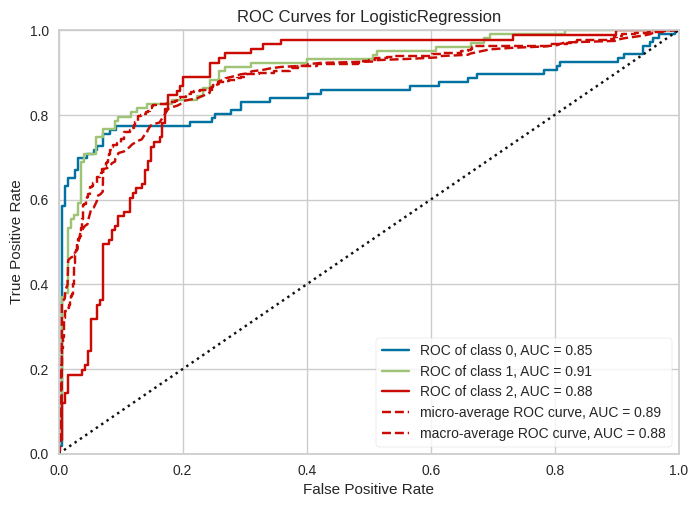

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# ЛР 4.3 - Кросс-валидация

### Цель работы

Познакомиться с основными типами разбиений данных при осуществлении кросс-валидации с использованием библиотеки sklearn.



### Содержание работы

1. Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.
2. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.
3. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.
4. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.
5. Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.
6. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.
7. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.
8. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.
9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.


### Выполнение

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = load_iris()
X=iris.data
y=iris.target

iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)



model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.8000000000000002


<Axes: >

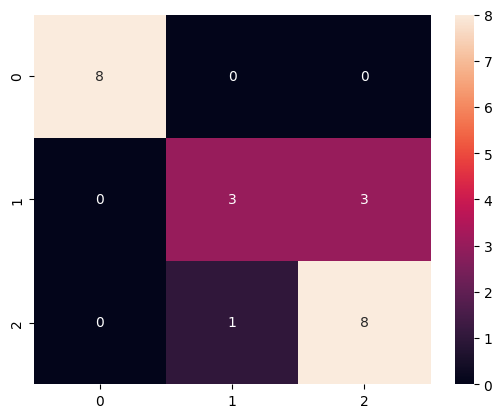

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


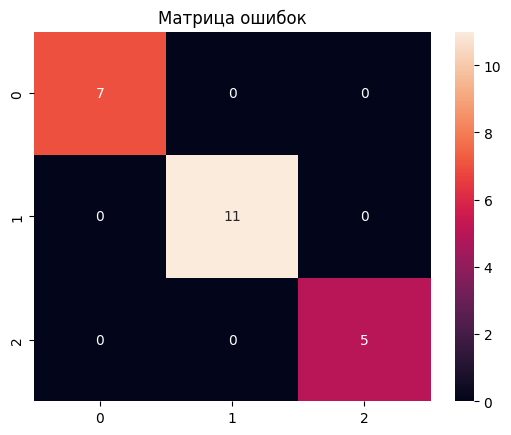

In [ ]:
plt.title("Матрица ошибок")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


Для устранения этих случайных колебаний и нужна перекрестная проверка или кросс-валидация.

Перекрестная проверка
Оценим работу построенной модели с помощью перекрёстной проверки.

Импортируем нужные библиотеки:


In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

k-fold разбиение

В k-блочной перекрёстной проверке исходные данные разбиваются на
k (примерно) равных по количеству частей, называемых "блоками", на 𝑘−1 из которых производится обучение, а на 1 валидация. В результате получается более робастная (устойчивая) оценка эффективности выбранной модели.

Создаём k-блочное разбиение (KFold):

In [ ]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))
print()
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]

Среднее по кросс-валидации:  0.9377247812705329


In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())


Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


Этот код делает примерно то же, что и предыдущий, но автоматически, с использованием библиотечной функции

Stratified k-Fold

Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество. Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов.

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


Leave-one-out
Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.

Создаём разбиение:

In [ ]:
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# ЛР 4.4 - Недообучение и переобучение

### Цель работы

Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).


### Содержание работы

1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.


### Выполнение

In [ ]:
import numpy as np
from numpy import genfromtxt

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures

from yellowbrick.model_selection import LearningCurve

Диагностика моделей классификации

 10 тысяч точек и 500 атрибутов. Из них всего 50 признаков будут информативными.

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


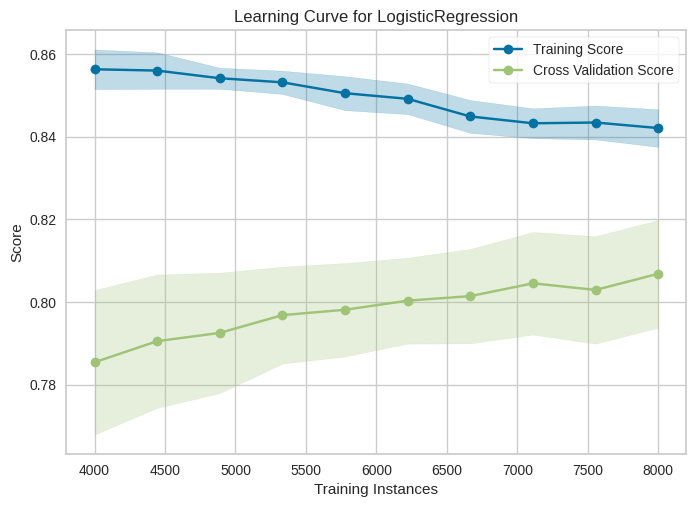

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Большой промежуток между тестовой и обучающей эффективностью свидетельствует о переобучении. А низкое значение обучающей эффективности - о недообучении.

In [ ]:
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


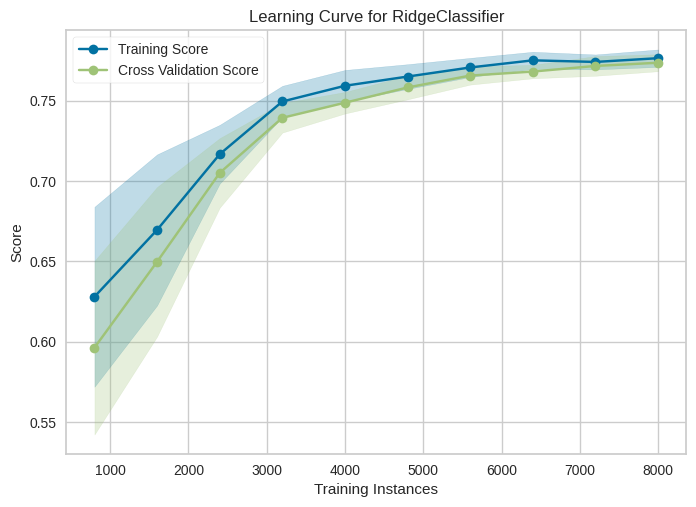

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

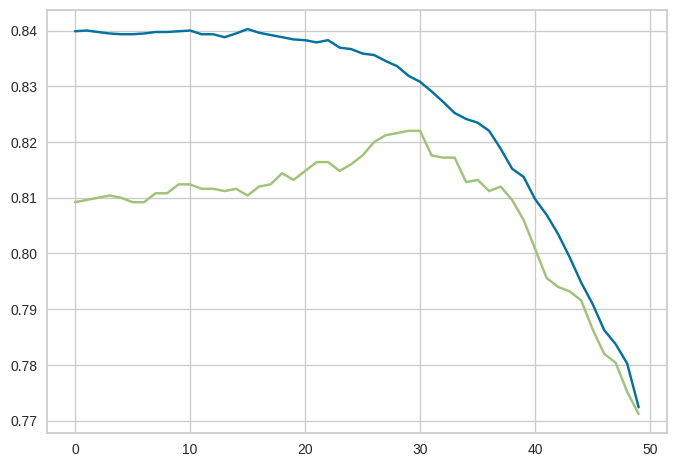

In [ ]:
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

Регуляризация добавляет дополнительный член к функции потерь (loss function), которую модель пытается минимизировать. Этот член зависит от сложности модели. Таким образом, модель пытается минимизировать не только ошибку на тренировочных данных, но и свою сложность.

In [ ]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


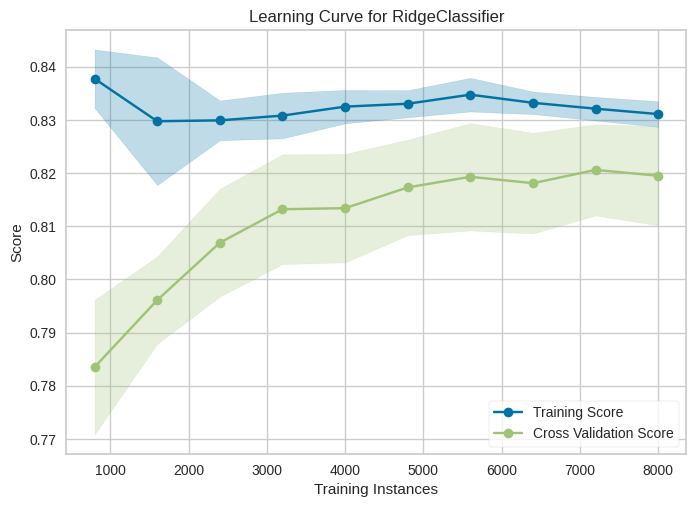

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

Диагностика моделей регрессии

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

FileNotFoundError: https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv not found.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


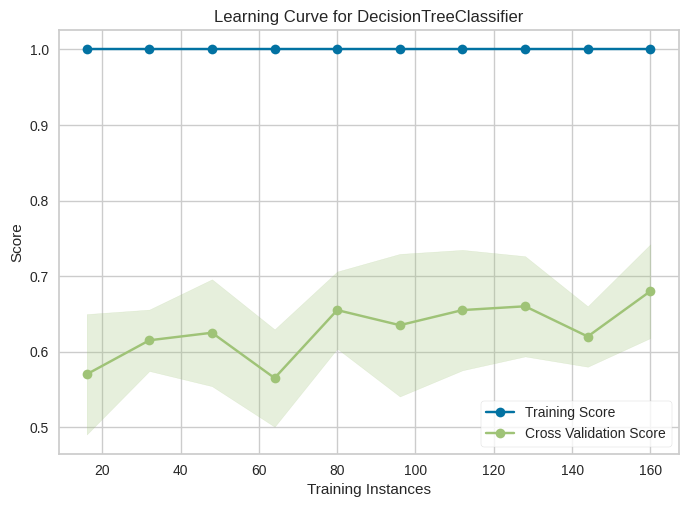

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

У деревьев решений один из параметров - максимальная глубина дерева как раз и влияет на склонность модели к переобучению. Аналогом регуляризации для деревьев будет искусственное ограничение максимальной глубины дерева. Давайте построим кривую обучения для такого регуляризованного дерева:

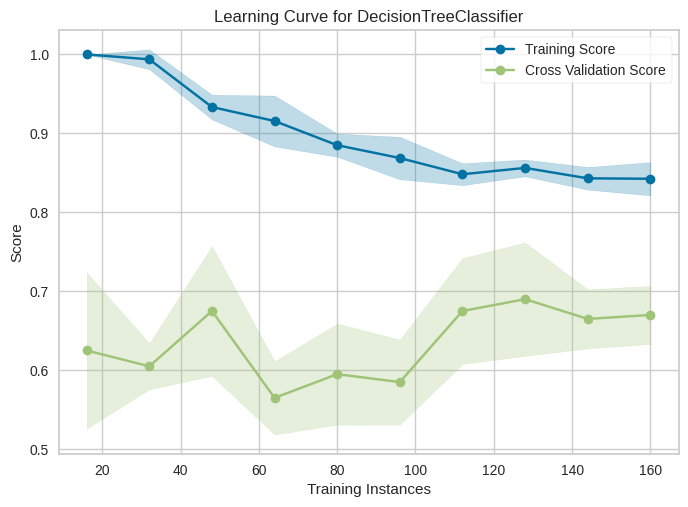

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

Введение регуляризации, искусственное упрощение моделей - не единственный способ борьбы с переобучением. Самый лучший способ - это обучение на более полном датасете, то есть добавление большого количества данных. В этом примере мы специально не использовали весь имеющийся набор данных. На части модель сильно переобучается, но чем больше данных, тем меньше модели (даже одинаковые по сложности) становятся склонными к переобучению.

Для иллюстрации этого повторим обучение нерегуляризованного дерева решений на всем датасете:



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


Диагностика недообучения

In [ ]:
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


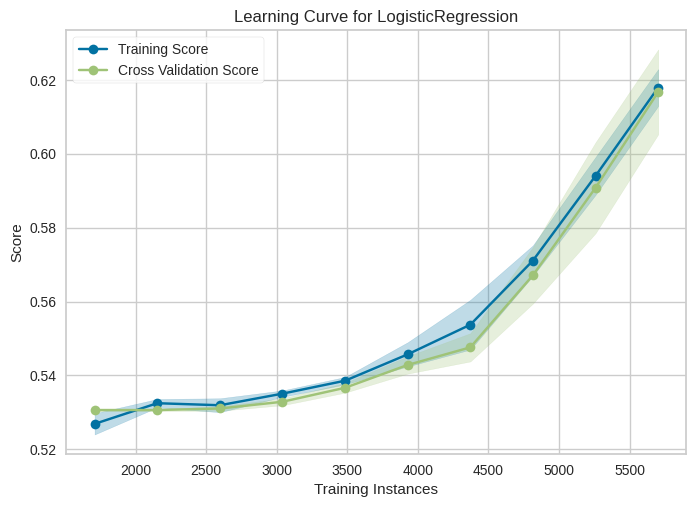

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

Здесь очевидны признаки недообучения: низкий уровень обучающей эффективности, малый разрыв между обучающей и тестовой эффективностью. При недообучении регуляризация не поможет, даже навредит, так как еще усилит его. Поэтому единственный путь в этом случае - использовать более сложные, вариативные модели. Можно, например, попробовать многослойный перцептрон:



In [ ]:
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))


Train score = 0.9383
Test score = 0.9383


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings("ignore")

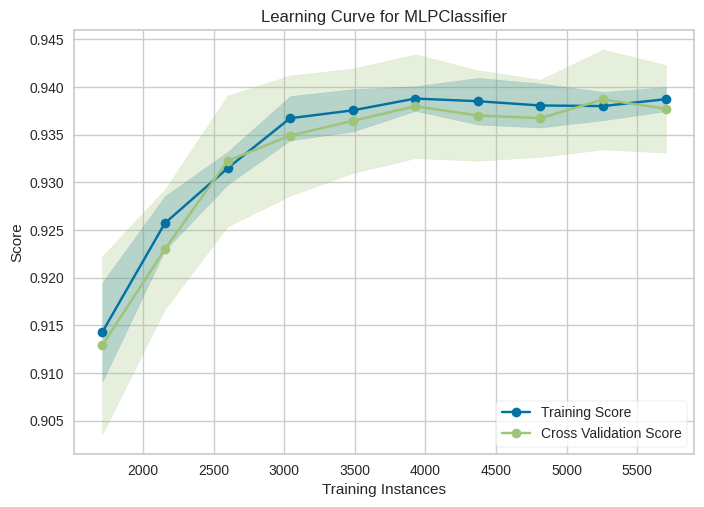

In [ ]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [ ]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


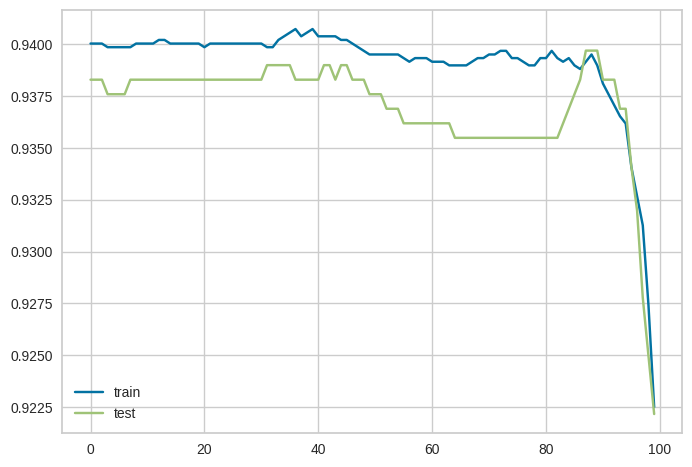

In [ ]:
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

### Задания для самостоятельного выполнения

#### Задание 1
Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [ ]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


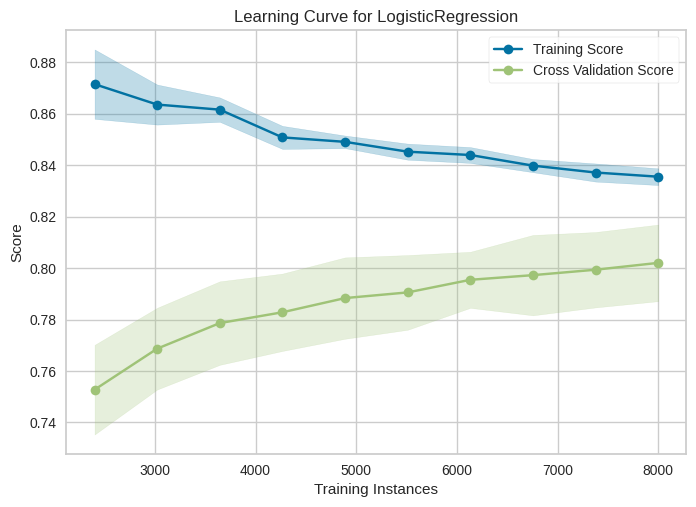

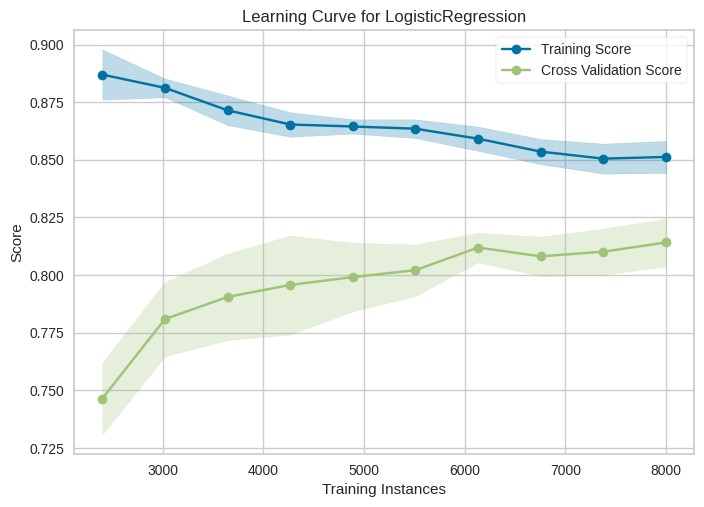

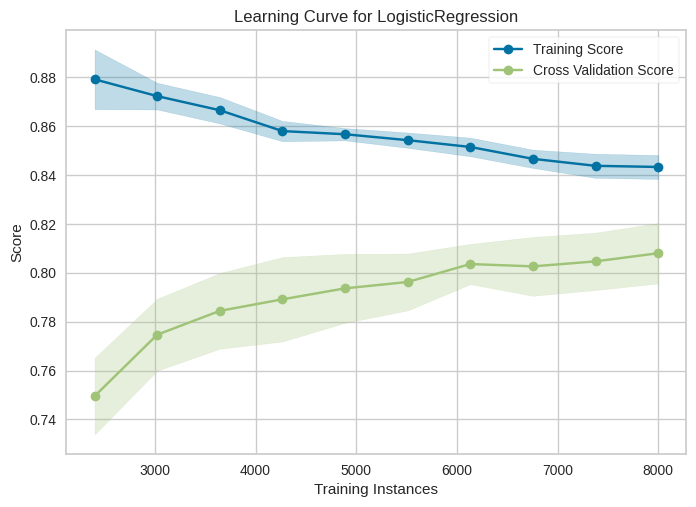

In [ ]:
scorings = ["precision", "recall", "f1"]


for scoring in scorings:
    visualizer = LearningCurve(
        LogisticRegression(), scoring=scoring, train_sizes=np.linspace(0.3, 1.0, 10)
    ).fit(X, y).show()

#### Задание 2
Повторите диагностику модели регрессии с использованием других видов моделей:


*   метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
*   метода ближайших соседей (исследуйте влияние количества соседей)
метода
*   решающих деревьев (гиперпараметры по вашему выбору)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['MEDV'] = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# важно для SVM и KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Метод опорных векторов

In [ ]:
C_values = [0.1, 1, 5]
train_scores_svm = []
test_scores_svm = []

for C in C_values:
    svm = SVR(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    train_scores_svm.append(svm.score(X_train_scaled, y_train))  # R2 score
    test_scores_svm.append(svm.score(X_test_scaled, y_test))  # R2 score

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores_svm, label='Train R2')
plt.plot(C_values, test_scores_svm, label='Test R2')
plt.xlabel('C')
plt.ylabel('R2 Score')
plt.title('SVM: R2 Score vs. C')
plt.xscale('log')
plt.legend()
plt.show()

KeyboardInterrupt: 

метод ближайших соседей

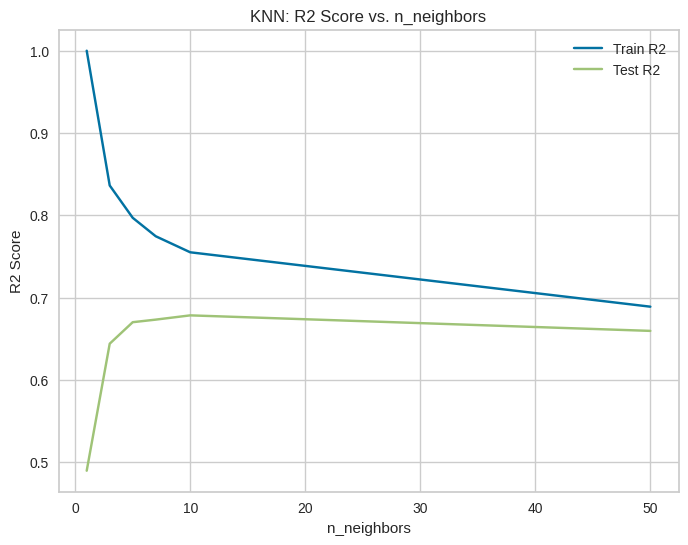

In [ ]:
n_neighbors_values = [1, 3, 5, 7, 10, 50]

train_scores_knn = []
test_scores_knn = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    train_scores_knn.append(knn.score(X_train_scaled, y_train))
    test_scores_knn.append(knn.score(X_test_scaled, y_test))#R2

plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_values, train_scores_knn, label='Train R2')
plt.plot(n_neighbors_values, test_scores_knn, label='Test R2')
plt.xlabel('n_neighbors')
plt.ylabel('R2 Score')
plt.title('KNN: R2 Score vs. n_neighbors')
plt.legend()
plt.show()

решающих деревьев

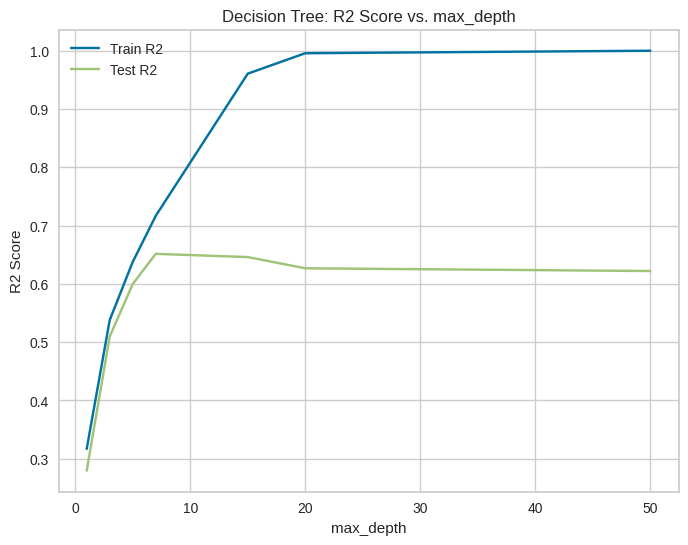

In [ ]:
max_depth_values = [1, 3, 5, 7, 15, 20, 50]
train_scores_dt = []
test_scores_dt = []

for max_depth in max_depth_values:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores_dt.append(dt.score(X_train, y_train))  # R2 score
    test_scores_dt.append(dt.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_scores_dt, label='Train R2')
plt.plot(max_depth_values, test_scores_dt, label='Test R2')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Decision Tree: R2 Score vs. max_depth')
plt.legend()
plt.show()

#### Задание 3
Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [ ]:
from sklearn.model_selection import learning_curve

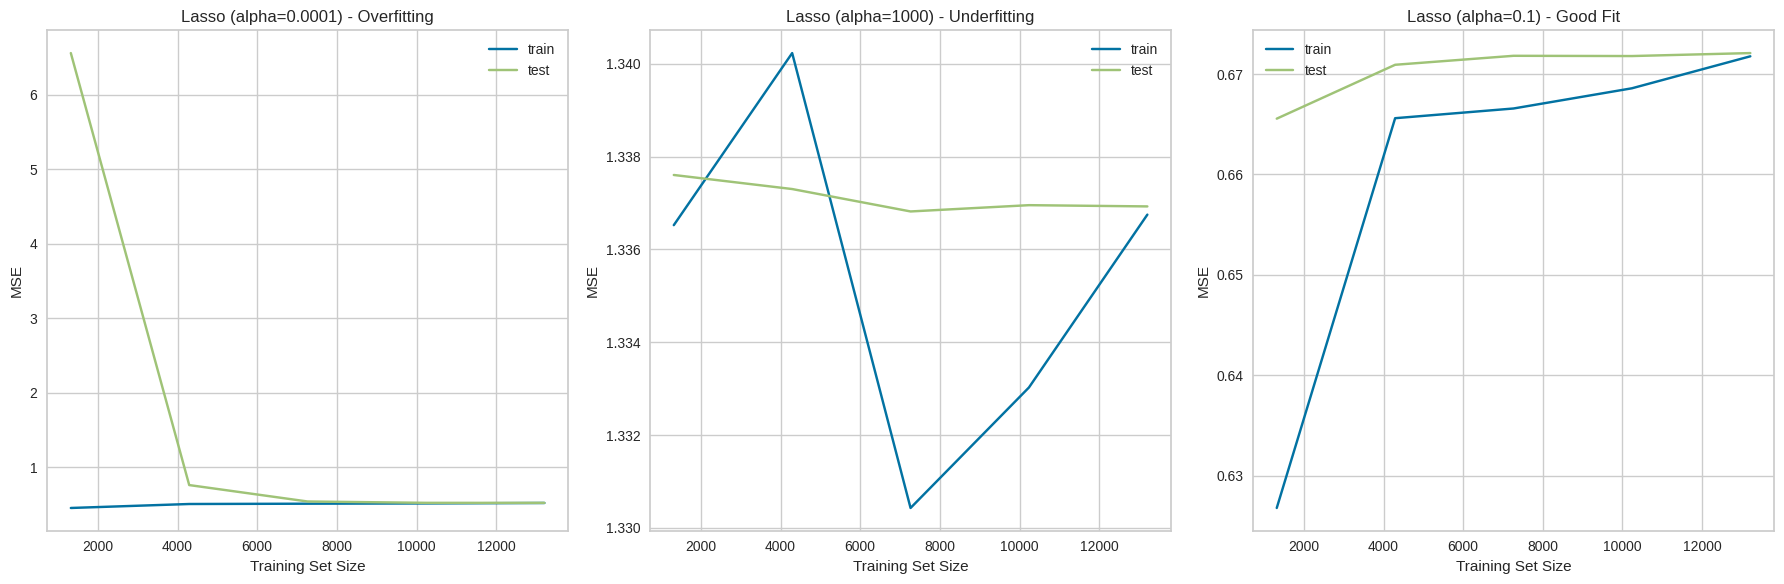

In [ ]:
def plot_learning_curve(model, X, y, title, ax):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='train')
    ax.plot(train_sizes, test_scores_mean, label='test')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('MSE')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


plot_learning_curve(Lasso(alpha=0.0001, random_state=42), X_train_scaled, y_train, 'Lasso (alpha=0.0001) - Overfitting', axes[0])

plot_learning_curve(Lasso(alpha=0.9, random_state=42), X_train_scaled, y_train, 'Lasso (alpha=1000) - Underfitting', axes[1])

plot_learning_curve(Lasso(alpha=0.1, random_state=42), X_train_scaled, y_train, 'Lasso (alpha=0.1) - Good Fit', axes[2])

plt.tight_layout()
plt.show()

#### Задание 4
В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+02, tolerance: 1.875e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.079e+01, tolerance: 1.875e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.211e+01, tolerance: 1.875e

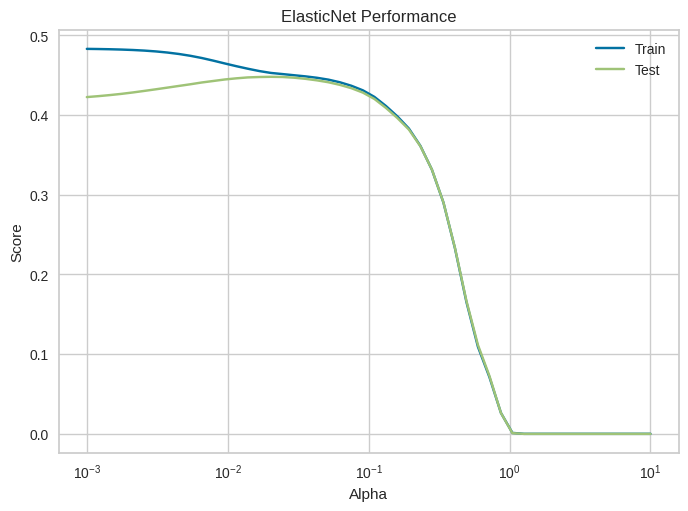

In [ ]:
trains = []
tests = []
alphas = np.logspace(-3, 1, 50)
for i in alphas:
  elastic_net = ElasticNet(alpha=i, l1_ratio=0.5, random_state=42)
  elastic_net.fit(X_train, y_train)
  trains.append(elastic_net.score(X_train, y_train))
  tests.append(elastic_net.score(X_test, y_test))

plt.plot(alphas, trains, label='Train')
plt.plot(alphas, tests, label='Test')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('ElasticNet Performance')
plt.legend()
plt.grid(True)
plt.show()

#### Задание 5
Повторите анализ на других реальных датасетах из репозитория OpenML:
* phoneme
* banknote-authentication
* delta_ailerons
* mammography
* mozilla4

In [ ]:
from sklearn.datasets import fetch_openml

Learning Curve - phoneme


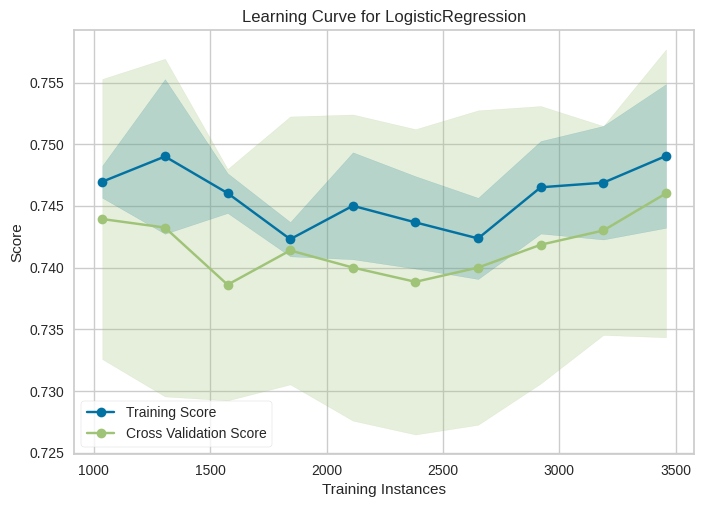

Learning Curve - banknote-authentication


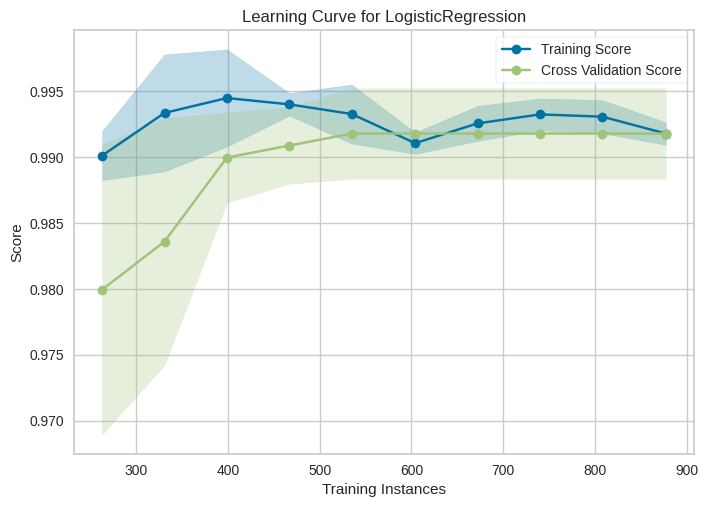

Learning Curve - delta_ailerons


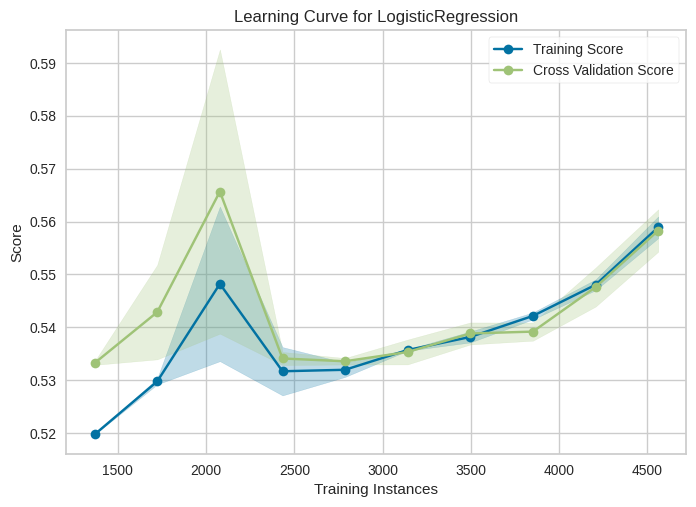

Learning Curve - mammography


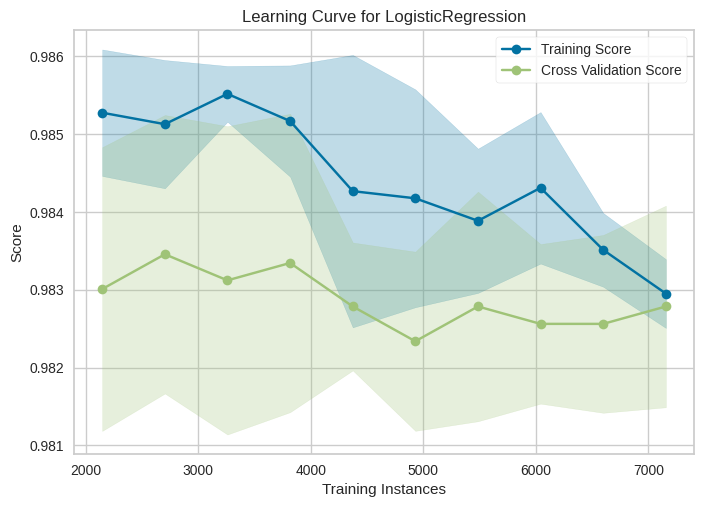

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning Curve - mozilla4


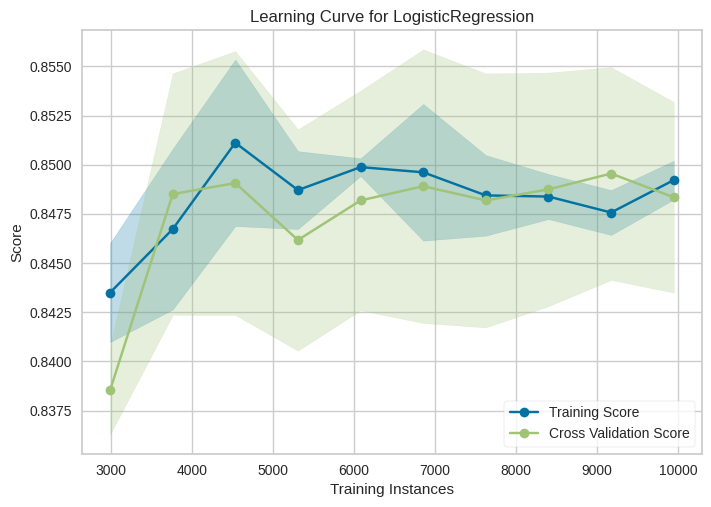

In [ ]:
datasets = [
    'phoneme',
    'banknote-authentication',
    'delta_ailerons',
    'mammography',
    'mozilla4'
]

for dataset_name in datasets:
    dataset = fetch_openml(dataset_name, version=1, as_frame=True)
    X = dataset.data
    y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    visualizer = LearningCurve(
            LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10), cv=5
        )
    visualizer.fit(X_train, y_train)
    print(f"Learning Curve - {dataset_name}")
    visualizer.show()